In [29]:
import pandas as pd 
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import ipywidgets as widgets
from ipywidgets import interact
from matplotlib.patches import Patch
from IPython.display import display, Markdown

In [30]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install plotly ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install pandas plotly IPython

Note: you may need to restart the kernel to use updated packages.


In [32]:
video_games_data = pd.read_csv("~/Desktop/UOP_Class/Comp293H_StoryTelling/DashboardProject/video_games_sales.csv")
video_games_data

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [33]:
#data cleaning and filtering 

video_games_data_cleaned = video_games_data.dropna(subset=['year'])
genre_yearly_sales = video_games_data_cleaned.groupby(['year', 'genre'])['global_sales'].sum().reset_index()
genre_yearly_sales.head()

,year,genre,global_sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49


## Try different plot to see 

/var/folders/v3/62dc7n2n3gvcmh5_hqpgf_7h0000gn/T/ipykernel_83887/1993026196.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



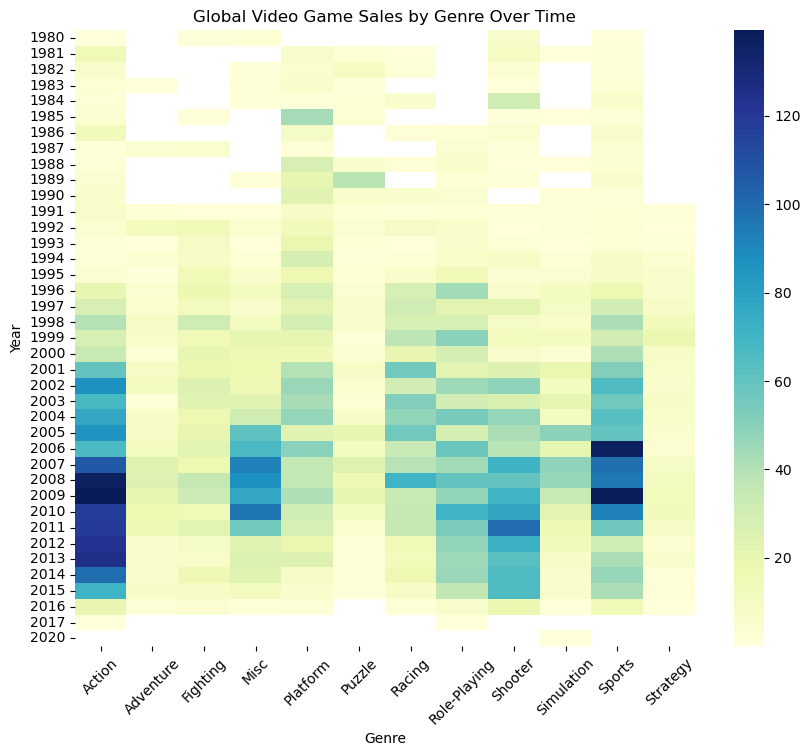

In [34]:
# Convert 'year' from float to int to remove decimal points
genre_yearly_sales['year'] = genre_yearly_sales['year'].astype(int)

# Pivot the data for the heatmap again
genre_sales_heatmap_data = genre_yearly_sales.pivot('year', 'genre', 'global_sales')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(genre_sales_heatmap_data, cmap="YlGnBu", fmt="d")

# Adding the title and labels for clarity
plt.title('Global Video Game Sales by Genre Over Time')
plt.xlabel('Genre')
plt.ylabel('Year')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Showing the heatmap
plt.show()


/var/folders/v3/62dc7n2n3gvcmh5_hqpgf_7h0000gn/T/ipykernel_83887/555563614.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



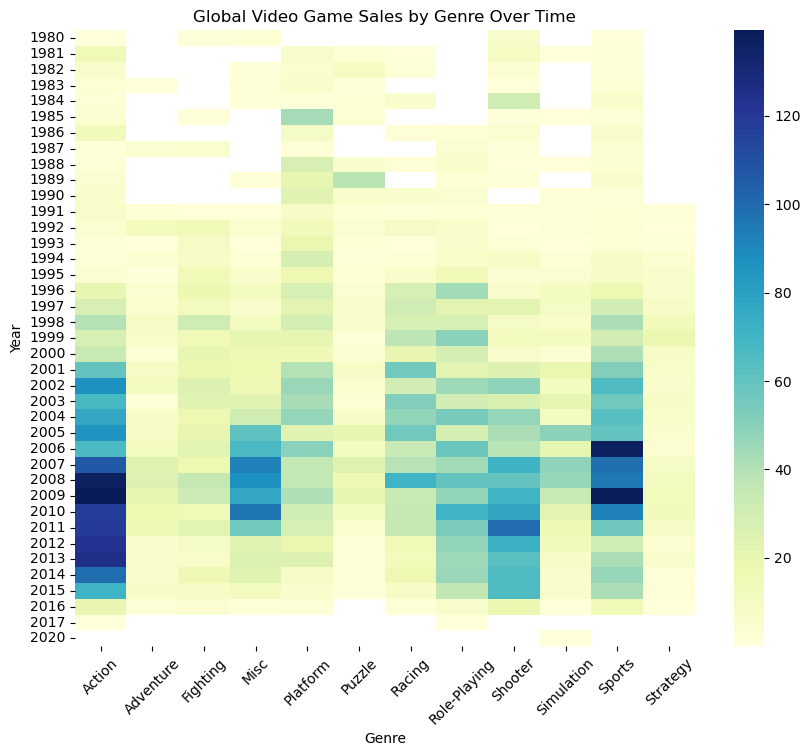

In [35]:
# Convert 'year' from float to int to remove decimal points
genre_yearly_sales['year'] = genre_yearly_sales['year'].astype(int)

# Pivot the data for the heatmap again
genre_sales_heatmap_data = genre_yearly_sales.pivot('year', 'genre', 'global_sales')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(genre_sales_heatmap_data, cmap="YlGnBu", fmt="d")

# Adding the title and labels for clarity
plt.title('Global Video Game Sales by Genre Over Time')
plt.xlabel('Genre')
plt.ylabel('Year')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Showing the heatmap
plt.show()

## 

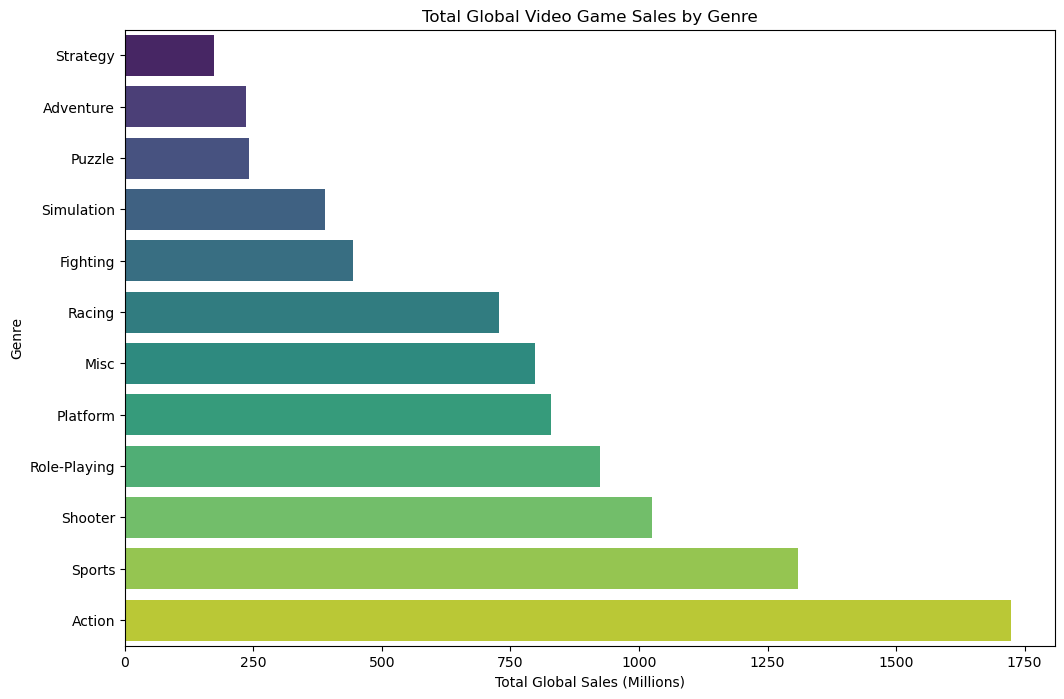

In [36]:
# Aggregate total sales for each genre across all years
total_genre_sales = genre_yearly_sales.groupby('genre')['global_sales'].sum().reset_index()

# Sort the genres by total sales in descending order for better visualization
total_genre_sales_sorted = total_genre_sales.sort_values('global_sales')

# Now we will create a bar plot using seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='global_sales', y='genre', data=total_genre_sales_sorted, palette='viridis')

# Adding the title and labels for clarity
plt.title('Total Global Video Game Sales by Genre')
plt.xlabel('Total Global Sales (Millions)')
plt.ylabel('Genre')

# Display the bar plot
plt.show()


In [37]:
na_sales_total = video_games_data['na_sales'].sum()  
eu_sales_total = video_games_data['eu_sales'].sum()  
jp_sales_total = video_games_data['jp_sales'].sum()  
other_sales_total = video_games_data['other_sales'].sum() 
global_sales_total = video_games_data['global_sales'].sum() 


# Create a DataFrame with the total sales for each region
region_sales_totals = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'global', 'other'],
    'Sales': [na_sales_total, eu_sales_total, jp_sales_total, global_sales_total, other_sales_total]
})

region_sales_totals


,Region,Sales
0,North America,4392.95
1,Europe,2434.13
2,Japan,1291.02
3,global,8920.44
4,other,797.75


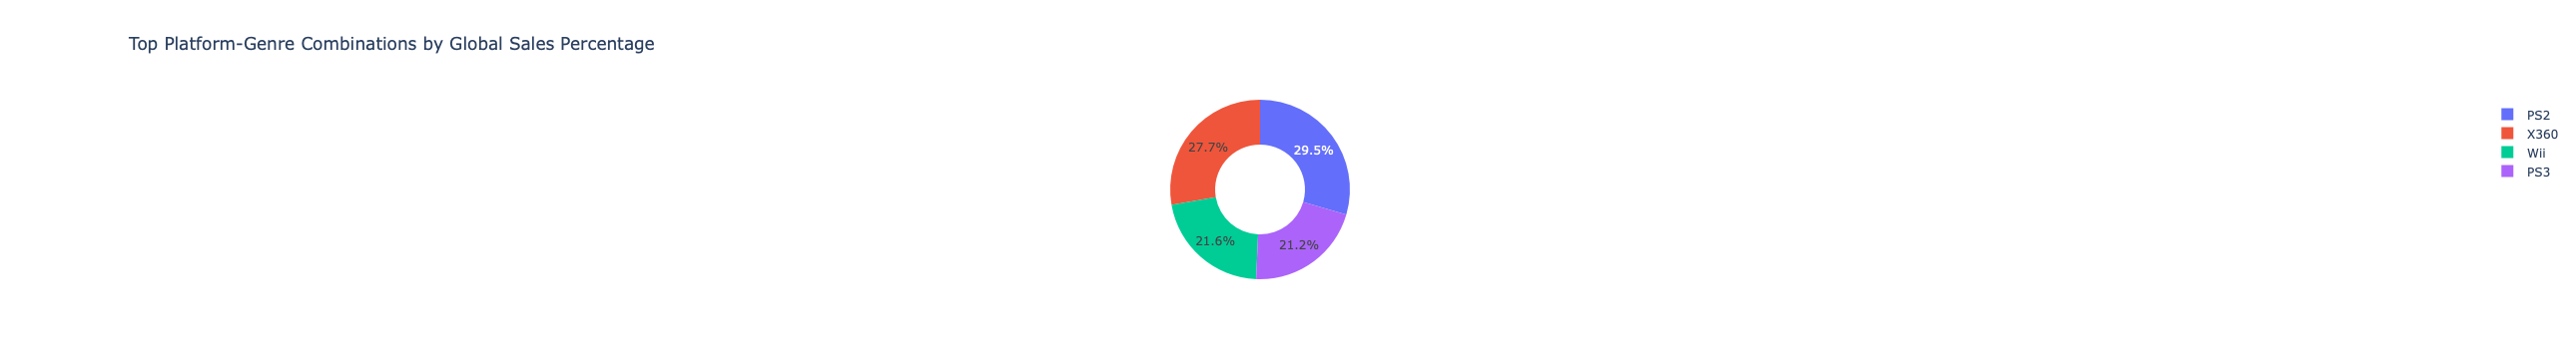

In [38]:

# Assuming you have a DataFrame called 'video_games_data'
# with columns 'Platform', 'Genre', and 'Global_Sales'

# Step 1: Group and sum the global sales
platform_genre_sales = video_games_data.groupby(['platform', 'genre'])['global_sales'].sum().reset_index()

# Step 2: Calculate the total sales for percentage calculation
total_global_sales = platform_genre_sales['global_sales'].sum()

# Step 3: Calculate the percentage of each platform-genre combination
platform_genre_sales['Percentage'] = 100 * platform_genre_sales['global_sales'] / total_global_sales

# Step 4: Sort and get the top platform-genre combinations
top_platform_genre_sales = platform_genre_sales.sort_values('Percentage', ascending=False).head(10)

# Step 5: Create the donut chart
fig = px.pie(top_platform_genre_sales,
             values='Percentage',
             names='platform',
             title='Top Platform-Genre Combinations by Global Sales Percentage',
             hole=0.5)

# Display the donut chart
fig.show()

In [39]:
# Sorting by each sales category and getting the top 6
sorted_na_sales = video_games_data.sort_values(by='na_sales', ascending=False)[['name', 'na_sales']].head(6)
sorted_eu_sales = video_games_data.sort_values(by='eu_sales', ascending=False)[['name', 'eu_sales']].head(6)
sorted_jp_sales = video_games_data.sort_values(by='jp_sales', ascending=False)[['name', 'jp_sales']].head(6)
sorted_other_sales = video_games_data.sort_values(by='other_sales', ascending=False)[['name', 'other_sales']].head(6)
sorted_global_sales = video_games_data.sort_values(by='global_sales', ascending=False)[['name', 'global_sales']].head(6)

# Display the top 6 sorted dataframes
print("Top 6 NA Sales:\n", sorted_na_sales, "\n")
print("Top 6 EU Sales:\n", sorted_eu_sales, "\n")
print("Top 6 JP Sales:\n", sorted_jp_sales, "\n")
print("Top 6 Other Sales:\n", sorted_other_sales, "\n")
print("Top 6 Global Sales:\n", sorted_global_sales, "\n")

Top 6 NA Sales:
                 name  na_sales
0         Wii Sports     41.49
1  Super Mario Bros.     29.08
9          Duck Hunt     26.93
5             Tetris     23.20
2     Mario Kart Wii     15.85
3  Wii Sports Resort     15.75 

Top 6 EU Sales:
                                             name  eu_sales
0                                     Wii Sports     29.02
2                                 Mario Kart Wii     12.88
3                              Wii Sports Resort     11.01
10                                    Nintendogs     11.00
16                            Grand Theft Auto V      9.27
19  Brain Age: Train Your Brain in Minutes a Day      9.26 

Top 6 JP Sales:
                              name  jp_sales
4        Pokemon Red/Pokemon Blue     10.22
12    Pokemon Gold/Pokemon Silver      7.20
1               Super Mario Bros.      6.81
6           New Super Mario Bros.      6.50
20  Pokemon Diamond/Pokemon Pearl      6.04
26    Pokemon Black/Pokemon White      5.65 

Top 6

## Creates a map plot for region sales

/var/folders/v3/62dc7n2n3gvcmh5_hqpgf_7h0000gn/T/ipykernel_83887/3950958564.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



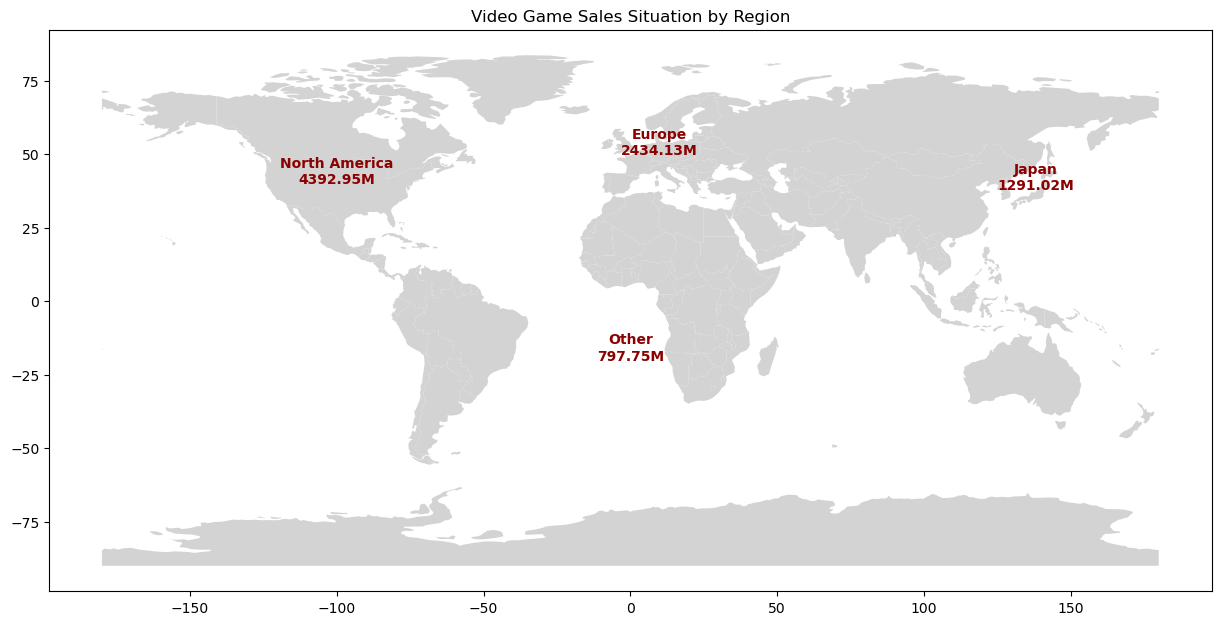

In [40]:
# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a simple DataFrame to hold our aggregated sales data and region names
region_names = ['North America', 'Europe', 'Japan', 'Other']
sales_values = [4392.95, 2434.13, 1291.02, 797.75]
region_sales = pd.DataFrame({'region': region_names, 'sales': sales_values})

# Manually add rough coordinates for the centroids of these regions for plotting
region_coordinates = {
    'North America': (-100, 40),
    'Europe': (10, 50),
    'Japan': (138, 38),
    'Other': (0, -20)  # Using an arbitrary point to represent "Other"
}

# Add coordinates to our DataFrame
region_sales['coordinates'] = region_sales['region'].map(region_coordinates)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
ax.set_title('Video Game Sales Situation by Region')

# Plot each region's sales as text on the map, scaled by sales magnitude
for index, row in region_sales.iterrows():
    ax.text(row['coordinates'][0], row['coordinates'][1], f"{row['region']}\n{row['sales']}M", 
            ha='center', weight='bold', color='darkred')

plt.show()


/var/folders/v3/62dc7n2n3gvcmh5_hqpgf_7h0000gn/T/ipykernel_83887/2931795404.py:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



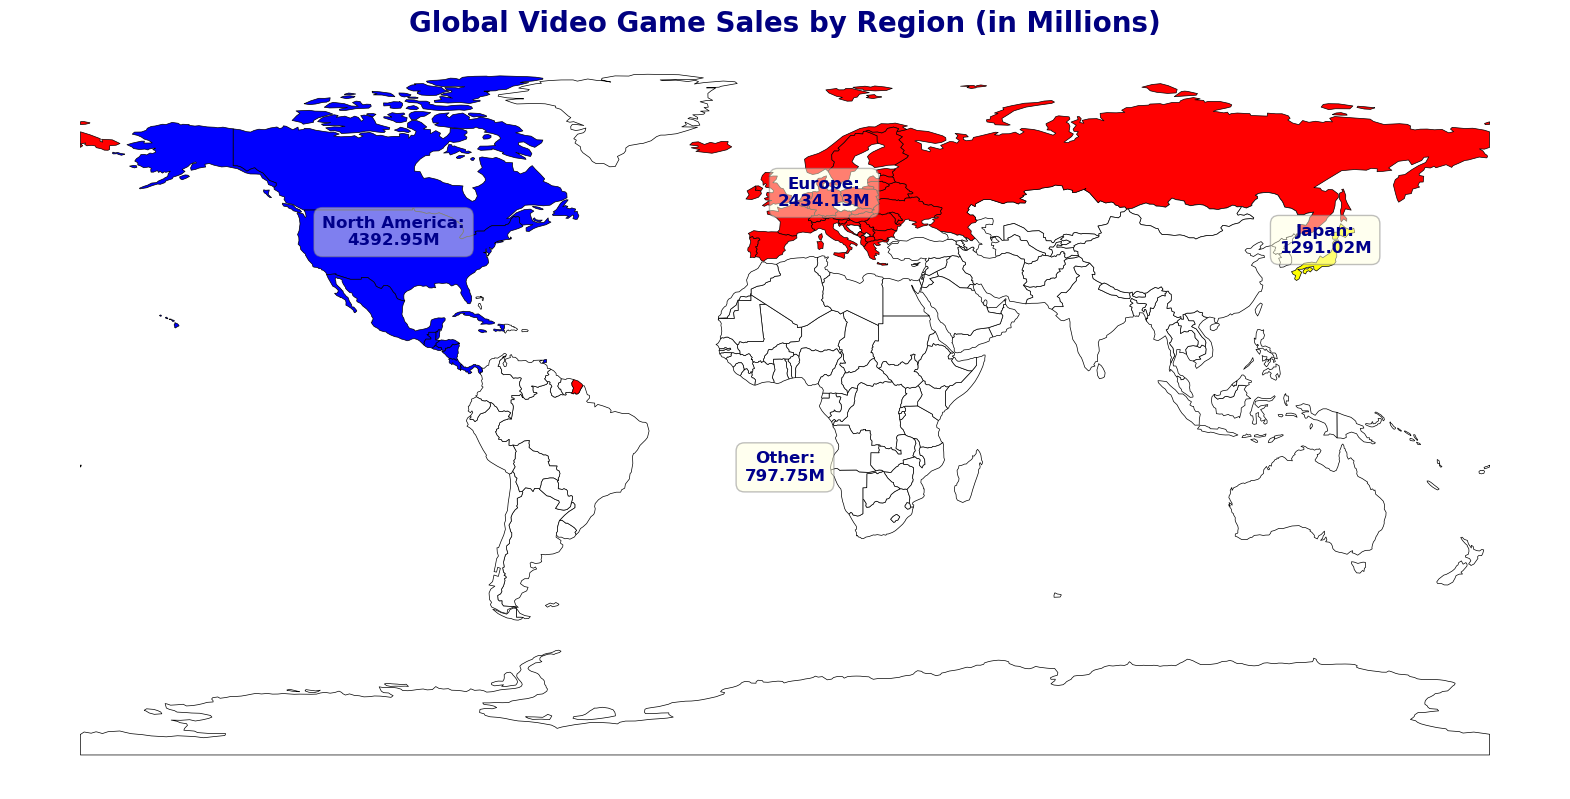

In [41]:

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Define the mapping from country names to regions
countries_to_regions = {
    'United States of America': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Guatemala': 'North America',
    'Cuba': 'North America',
    'Haiti': 'North America',
    'Dominican Republic': 'North America',
    'Honduras': 'North America',
    'Nicaragua': 'North America',
    'El Salvador': 'North America',
    'Costa Rica': 'North America',
    'Panama': 'North America',
    'Jamaica': 'North America',
    'Trinidad and Tobago': 'North America',
    'The Bahamas': 'North America',
    'Barbados': 'North America',
    'Saint Lucia': 'North America',
    'Grenada': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Antigua and Barbuda': 'North America',
    'Belize': 'North America',
    'Saint Kitts and Nevis': 'North America',
    'Dominica': 'North America',
    'France': 'Europe',
    'Germany': 'Europe',
    'United Kingdom': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Japan': 'Japan',
    'Poland': 'Europe',
    'Ukraine': 'Europe',
    'Romania': 'Europe',
    'Netherlands': 'Europe',
    'Belgium': 'Europe',
    'Sweden': 'Europe',
    'Czech Republic (Czechia)': 'Europe',
    'Greece': 'Europe',
    'Portugal': 'Europe',
    'Hungary': 'Europe',
    'Belarus': 'Europe',
    'Austria': 'Europe',
    'Switzerland': 'Europe',
    'Serbia': 'Europe',
    'Bulgaria': 'Europe',
    'Denmark': 'Europe',
    'Slovakia': 'Europe',
    'Finland': 'Europe',
    'Norway': 'Europe',
    'Ireland': 'Europe',
    'Croatia': 'Europe',
    'Moldova': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Albania': 'Europe',
    'Lithuania': 'Europe',
    'Slovenia': 'Europe',
    'North Macedonia': 'Europe',
    'Latvia': 'Europe',
    'Estonia': 'Europe',
    'Luxembourg': 'Europe',
    'Montenegro': 'Europe',
    'Malta': 'Europe',
    'Iceland': 'Europe',
    'Andorra': 'Europe',
    'Liechtenstein': 'Europe',
    'Monaco': 'Europe',
    'San Marino': 'Europe',
    'Holy See': 'Europe',
    'Russia': 'Europe'
}

# Assign regions and colors
world['region'] = world['name'].apply(lambda x: countries_to_regions.get(x, 'Other'))
region_colors = {
    'North America': 'blue',
    'Europe': 'red',
    'Japan': 'yellow',
    'Other': 'white'
}
world['color'] = world['region'].map(region_colors)

# Enhanced Plotting
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
world.plot(ax=ax, color=world['color'], edgecolor='black', linewidth=0.5)
ax.set_title('Global Video Game Sales by Region (in Millions)', fontsize=20, fontweight='bold', color='navy')
ax.axis('off')

for index, row in region_sales.iterrows():
    ax.text(row['coordinates'][0], row['coordinates'][1], f"{row['region']}:\n{row['sales']}M",
            ha='center', fontsize=12, fontweight='bold', color='darkblue',
            bbox=dict(facecolor='lightyellow', alpha=0.5, edgecolor='grey', boxstyle='round,pad=0.5'))



plt.show()


In [42]:
def create_interactive_plot(category):
    # Group the data by the selected category and sum the sales
    grouped_data = video_games_data.groupby(category)[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
    
    # Limit the number of publishers for better visualization
    if category == 'publisher':
        top_publishers = video_games_data['publisher'].value_counts().nlargest(30).index
        grouped_data = grouped_data.loc[top_publishers]
    
    # Create a bar plot for the selected category
    fig = go.Figure()
    for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
        fig.add_trace(go.Bar(x=grouped_data.index, y=grouped_data[region], name=region))
    
    fig.update_layout(barmode='group', title=f'Sales by {category}', xaxis_title=category, yaxis_title='Sales')
    fig.show()

# Create a dropdown widget for selecting the category
category_dropdown = widgets.Dropdown(options=['year', 'platform', 'genre', 'publisher'],
                                     description='Category:')

# Create an interactive plot using the dropdown widget
interact(create_interactive_plot, category=category_dropdown)

interactive(children=(Dropdown(description='Category:', options=('year', 'platform', 'genre', 'publisher'), va…

<function __main__.create_interactive_plot(category)>

Note: you may need to restart the kernel to use updated packages.
